In [36]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.color_palette("Paired")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
df = pd.read_csv('/content/IPL_matches_Dataset.csv')

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(4), object(13)
memory usag

In [4]:
df.shape

(756, 18)

In [10]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [11]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

Dropping umpire3 column

In [12]:
df = df.drop(columns=['umpire3'], axis=1)

In [25]:
# extracting string and keeping only integers value in season col and converting its datatype to int
df['Season'] = df['Season'].str.extract('(\d+)')

In [27]:
df['Season'] = df['Season'].astype(int)

In [26]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

#Analysis

In [31]:
teams_per_season = df.groupby('Season')['winner'].value_counts()
teams_per_season

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

In [32]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in teams_per_season.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({'year': [items[0][0]],'team': [items[0][1]],'wins': [items[1]]})
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

((2008, 'Rajasthan Royals'), 13)
((2009, 'Delhi Daredevils'), 10)
((2010, 'Mumbai Indians'), 11)
((2011, 'Chennai Super Kings'), 11)
((2012, 'Kolkata Knight Riders'), 12)
((2013, 'Mumbai Indians'), 13)
((2014, 'Kings XI Punjab'), 12)
((2015, 'Chennai Super Kings'), 10)
((2016, 'Sunrisers Hyderabad'), 11)
((2017, 'Mumbai Indians'), 12)
((2018, 'Chennai Super Kings'), 11)
((2019, 'Mumbai Indians'), 11)


In [33]:
win_per_season_df

,year,team,wins
0,2008,Rajasthan Royals,13
0,2009,Delhi Daredevils,10
0,2010,Mumbai Indians,11
0,2011,Chennai Super Kings,11
0,2012,Kolkata Knight Riders,12
0,2013,Mumbai Indians,13
0,2014,Kings XI Punjab,12
0,2015,Chennai Super Kings,10
0,2016,Sunrisers Hyderabad,11
0,2017,Mumbai Indians,12


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


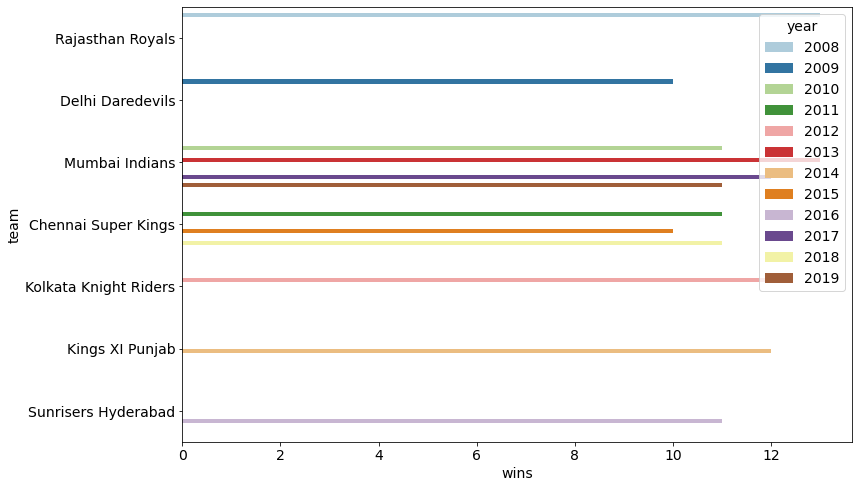

In [42]:
sns.barplot('wins', 'team', hue='year', data=win_per_season_df, palette='Paired')

<b>Observations</b>:
Mumbai Indians has secured the most wins in four seasons(2010, 2013, 2017, and 2019).

# The venue that hosted the maximum number of matches

In [43]:
venue_ser = df['venue'].value_counts()

In [47]:
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [49]:
venue_df.head()

,venue,matches
0,Eden Gardens,77
1,M Chinnaswamy Stadium,73
2,Wankhede Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56


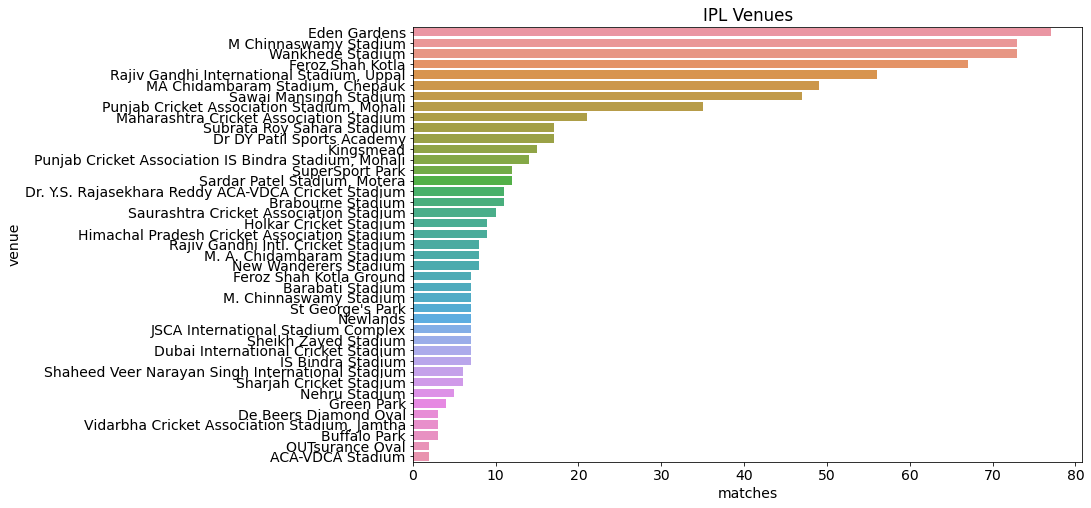

In [50]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

<b>Observations</b>:
Eden Gardens has hosted the maximum number of IPL matches followed by Wankhede Stadium and M Chinnaswamy Stadium.
Till 2019, IPL matches were hosted by 40 venues.

# The most successful IPL team

In [51]:
team_wins_ser = df['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [52]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


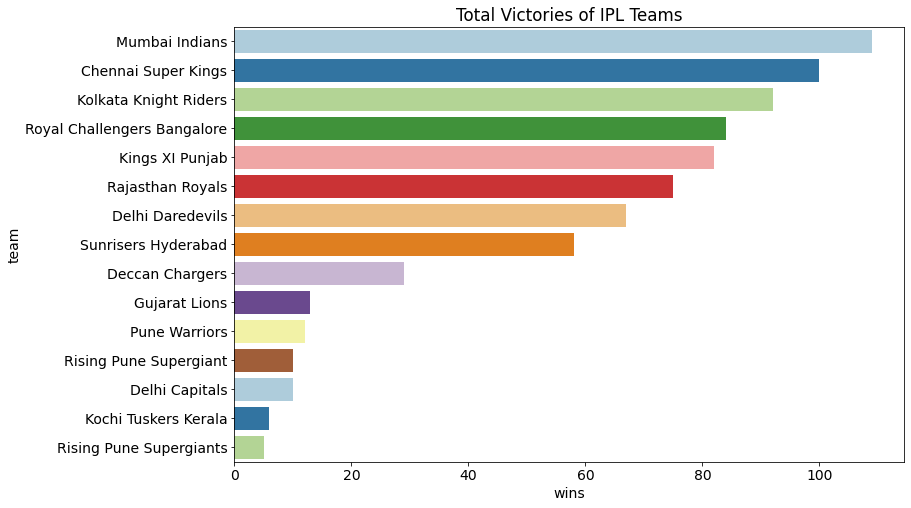

In [53]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired')

<b>Observations:</b>
Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -109) followed by Chennai Super Kings and Kolkata Knight Riders.

# Most Valuable Player

In [55]:
mvp_ser = df['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [56]:
mvp_ser

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

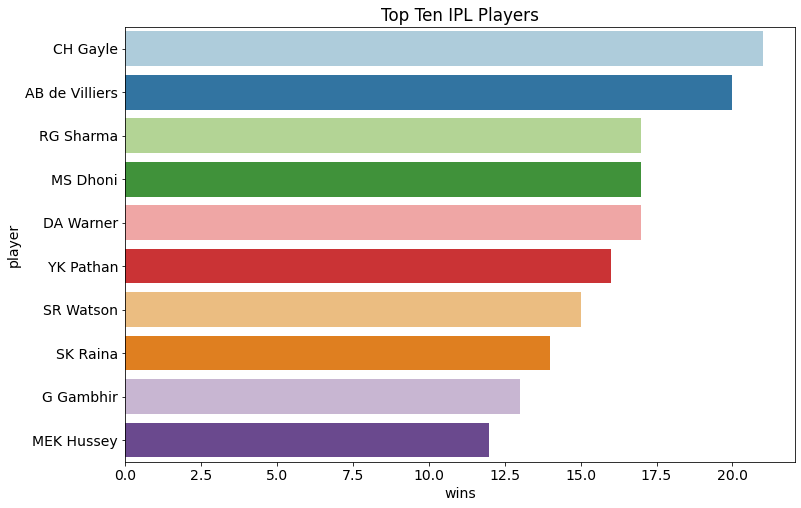

In [57]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired')

<b>Observations:</b>
Cris Gayle is the player who won the most player of the match awards and hence is the most valuable player.
Six Indian players have figured in the top ten IPL players list.

# The team that won the most number of toss

In [58]:
toss_ser = df['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [59]:
toss_df

,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


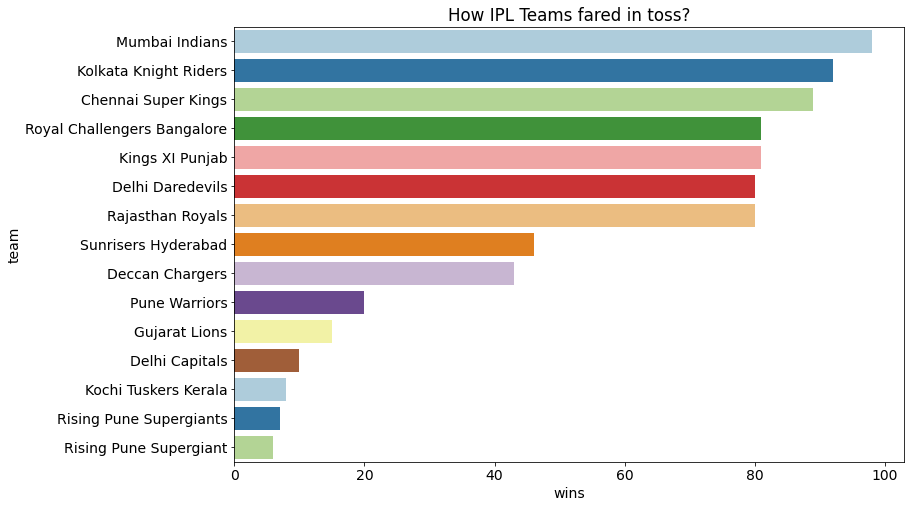

In [61]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

<b>Observations</b>:
Mumbai Indians has won the most toss(till 2019) in IPL history.
All the top teams in IPL are successful in winning the toss as well.

# Asking & Answering Questions

##Q: Which umpire has officiated the most number of IPL matches on-field?

In [64]:
umpire1_ser = df['umpire1'].value_counts()
umpire2_ser = df['umpire2'].value_counts()

In [65]:
umpires_df = pd.concat([umpire1_ser, umpire2_ser], axis=1)
umpires_df

,umpire1,umpire2
HDPK Dharmasena,73.0,14.0
Asad Rauf,51.0,NaN
S Ravi,49.0,57.0
AK Chaudhary,43.0,15.0
Aleem Dar,38.0,NaN
...,...,...
K Srinivasan,NaN,3.0
KN Anantapadmanabhan,NaN,3.0
SD Ranade,NaN,2.0
Nand Kishore,NaN,1.0


In [66]:
umpire_ser = umpires_df.sum(axis=1)

umpire_df = pd.DataFrame(columns=["umpire", "matches"])

for items in umpire_ser.iteritems():
    temp_df4 = pd.DataFrame({
        'umpire':[items[0]],
        'matches':[items[1]]
    })
    umpire_df= umpire_df.append(temp_df4, ignore_index=True)

In [69]:
umpire_df

,umpire,matches
0,HDPK Dharmasena,87.0
1,Asad Rauf,51.0
2,S Ravi,106.0
3,AK Chaudhary,58.0
4,Aleem Dar,38.0
...,...,...
70,K Srinivasan,3.0
71,KN Anantapadmanabhan,3.0
72,SD Ranade,2.0
73,Nand Kishore,1.0


In [70]:
umpire_df.sort_values('matches', ascending=False).head()

,umpire,matches
2,S Ravi,106.0
0,HDPK Dharmasena,87.0
11,C Shamshuddin,73.0
3,AK Chaudhary,58.0
57,SJA Taufel,55.0


S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field, followed by former Sri Lankan international cricketer HDPK Dharmasena.

# Q: Which team is the most successful team in IPL?

In [71]:
team_wins_df

,team,wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Rajasthan Royals,75
6,Delhi Daredevils,67
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Gujarat Lions,13


Mumbai Indians is most successful team in IPL

# Q: Which city has hosted the maximum number of IPL matches?

In [72]:
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [73]:
city_ser = df['city'].value_counts()

city_df = pd.DataFrame(columns=['city', 'matches'])
for items in city_ser.iteritems():
    temp_df6 = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city_df = city_df.append(temp_df6, ignore_index=True)

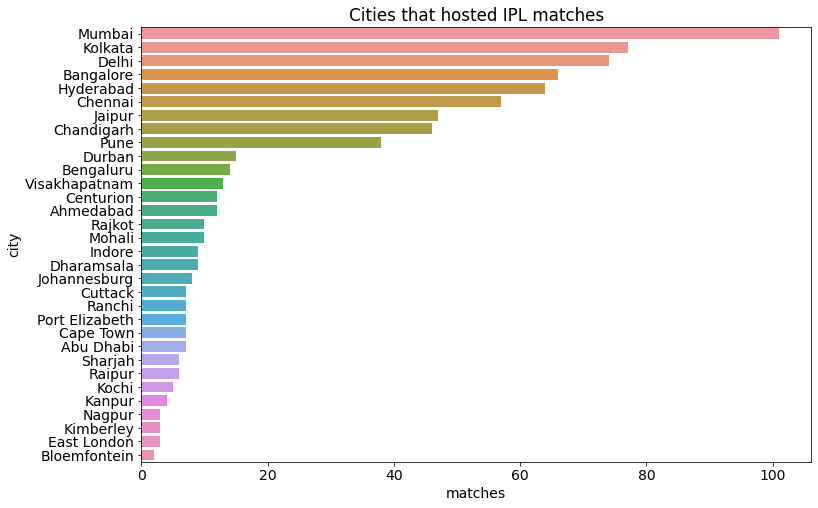

In [74]:
plt.title("Cities that hosted IPL matches")
sns.barplot(x='matches', y='city', data=city_df);

The city of Mumbai has hosted the maximum number of IPL matches.

Q: Does winning the toss has any advantage?

In [76]:
win_count = 0
for index, value in df.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(df)
print('The probability of winning if won the toss: {:.2f}' .format(prob))

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


The probability of winning when the team had won the toss is 52%. So winning toss gives a slight edge over the opponent. However, it would be naive to term winning the toss as a greater advantage as there were 363 instances when the team losing the toss has won the game.

Q: What are the major victories in IPL? Is it better to defend or chase in IPL?

In [77]:
len(df)

756

In [79]:
defend_vict_ser = df['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

118      1
130      1
60       1
87       1
62       1
      ... 
1       10
10      11
4       11
14      13
0      419
Name: win_by_runs, Length: 89, dtype: int64

Of the 756 IPL matches played from 2008 to 2019, 419 matches were won chasing the target. Hence, more victories were registered by teams chasing a total(batting second) than defending the total.<BR>
When defending a total, the biggest victory was by 146 runs. Let’s find out that particular match.

In [81]:
score = 146
for index, row in df.iterrows():
    if(row['win_by_runs'] == score):
        print(row)  

id                               44
Season                         2017
city                          Delhi
date                     06-05-2017
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object


The greatest victory in IPL on defending a total is for Mumbai Indians when they defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi.

In [82]:
chasing_vict_ser = df['win_by_wickets'].value_counts()
chasing_vict_ser

0     350
6      85
7      80
5      71
8      54
4      41
9      37
3      18
10     11
2       6
1       3
Name: win_by_wickets, dtype: int64

Of the 756 IPL matches played from 2008 to 2019, 350 matches were won defending the total.<br>
When chasing a target, the biggest victory was by 10 wickets(without losing any wickets). There were 11 such instances and we can find the details about those matches by the following code snippet:

In [83]:
for index, row in df.iterrows():
    if(row['win_by_wickets'] == 10):
        print(row)

id                                                      3
Season                                               2017
city                                               Rajkot
date                                           07-04-2017
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

In [84]:
chasing_vict_df = pd.DataFrame(columns=['victory_margin', 'instances'])

for items in chasing_vict_ser.iteritems():    
    temp_df7 = pd.DataFrame({
        'victory_margin': [items[0]],
        'instances': [items[1]]
    })
    chasing_vict_df = chasing_vict_df.append(temp_df7, ignore_index=True)
    
#to drop the first row as it represents victory margin of zero wickets(victory by defending a total)
chasing_vict_df2 = chasing_vict_df.drop([0]) 
chasing_vict_df2

,victory_margin,instances
1,6,85
2,7,80
3,5,71
4,8,54
5,4,41
6,9,37
7,3,18
8,10,11
9,2,6
10,1,3


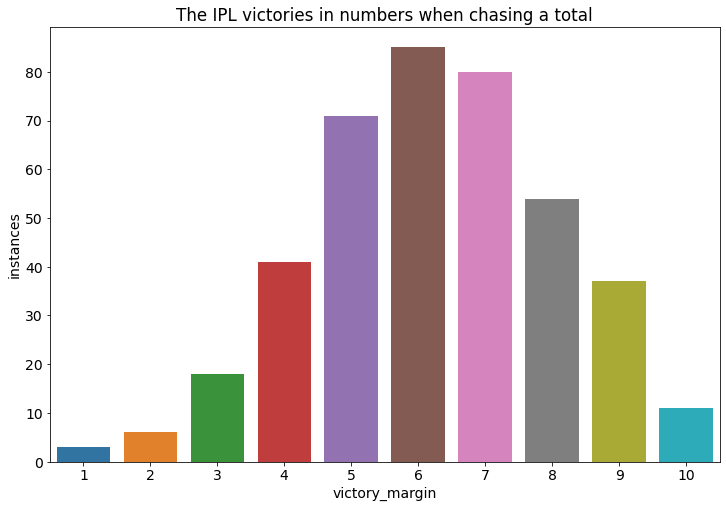

In [85]:
plt.title('The IPL victories in numbers when chasing a total')
sns.barplot(x='victory_margin', y='instances', data=chasing_vict_df2);


<font color='red'><b>Inferences and Conclusion</b><br>
<b>Let’s summarize the important observations we made during Exploratory Data Analysis:</b></font


---

***Mumbai Indians is the most successful team in IPL.<br>
*Mumbai Indians has won the most number of toss.<br>
*There were more matches won by chasing the total(419 matches) than defending(350 matches).<br>
*When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).<br>
*When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.<br>
*The Mumbai city has hosted the most number of IPL matches.<br>
*Chris Gayle has won the maximum number of player of the match title.<br>
*Winning toss gives a slight edge(52% probability of winning) against the opponents.<br>
*Five Indian players have figured in the top ten IPL players list.<br>
*S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.<br>
*Eden Gardens has hosted the maximum number of IPL matches.<br>
*Till 2019, 40 venues have hosted 756 IPL matches.<br>**









